In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [2]:
years = np.arange(1959, 2025)
data = np.array([315.98, 316.91, 317.64, 318.45, 318.99, 319.62, 320.04, 321.37, 322.18, 323.05, 324.62, 325.68, 326.32, 327.46,
        329.68, 330.19, 331.13, 332.03, 333.84, 335.41, 336.84, 338.76, 340.12, 341.48, 343.15, 344.87, 346.35, 347.61,
        349.31, 351.69, 353.2, 354.45, 355.7, 356.54, 357.21, 358.96, 360.97, 362.74, 363.88, 366.84, 368.54, 369.71,
        371.32, 373.45, 375.98, 377.7, 379.98, 382.09, 384.02, 385.83, 387.64, 390.1, 391.85, 394.06, 396.74, 398.81,
        401.01, 404.41, 406.76, 408.72, 411.65, 414.21, 416.41, 418.53, 421.08, 424.61])
x = np.arange(len(years))
def exp_model(x, a, b, c):
    return a * np.exp(b * (x - 1959)) + c
popt, pcov = curve_fit(exp_model, years, data, p0=[300, 0.01, 0])  # initial guess
a, b, c = popt
print(f"Best fit parameters: a={a:.4f}, b={b:.6f}, c={c:.4f}")
# Predict values
years_fit = np.linspace(1959, 2060, 300)
data_fit = exp_model(years_fit, *popt)

Best fit parameters: a=59.2579, b=0.016106, c=255.4593


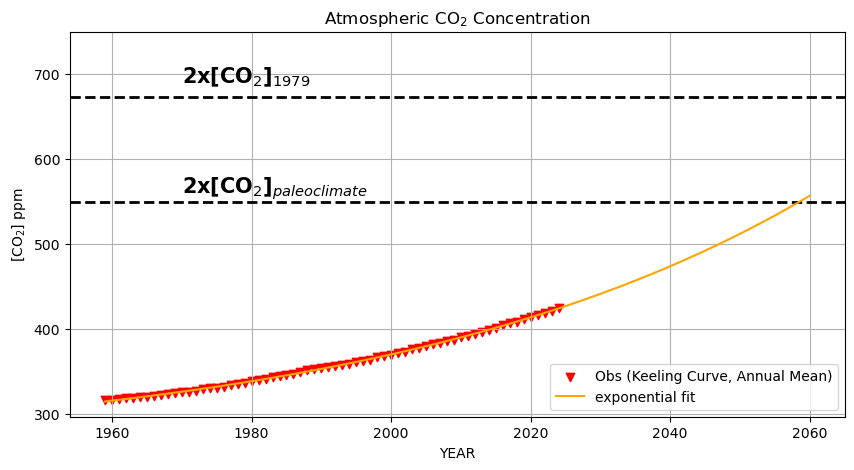

In [3]:
fig, ax = plt.subplots(1, figsize=(10,5))
ax.grid()
ax.scatter(years, data, label='Obs (Keeling Curve, Annual Mean)', marker='v', c='red')
ax.set_xlabel('YEAR')
ax.set_ylabel(f'[CO$_2$] ppm')
ax.set_title(r'Atmospheric CO$_2$ Concentration')
# ax.plot(range(1959, 2025), np.)
ax.axhline(data[1979-1959] * 2, c='k', linestyle='--', lw=2)#, label=r'2x[CO$_2$]$_{1979}$')
ax.axhline(550, c='k', linestyle='--', lw=2)#, label=r'2x[CO$_2$]$_{pl}$')
ax.plot(years_fit, data_fit, c='orange', label='exponential fit')
ax.legend(loc='lower right')
ax.text(1970, 560, r'2x[CO$_2$]$_{paleoclimate}$', fontdict=dict(fontsize=15, fontweight='bold'))
ax.text(1970, 690, r'2x[CO$_2$]$_{1979}$', fontdict=dict(fontsize=15, fontweight='bold'))
ax.set_ylim(None, 750)
fig.savefig('CO2trend.png')